## Importing libraries

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers

import os
import numpy as np
import matplotlib.pyplot as plt

## Loading datasets alongwith Data Augmentation

In [2]:
train_dir = "D:\\Mayuresh\\ThesisDataset\\GlobalSigns\\Dataset\\TrainingDataset"
validation_dir = "D:\\Mayuresh\\ThesisDataset\\GlobalSigns\\Dataset\\ValidationDataset"
# test_dir = "D:\\Mayuresh\hsrsnao\\customDataset\\test"

In [3]:
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
NUM_CLASSES = 3

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.3,
                                   zoom_range=0.2,
                                   rotation_range=45,
                                   fill_mode='nearest',
                                   horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                    batch_size = BATCH_SIZE,
                                                    class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                        batch_size = BATCH_SIZE,
                                                        class_mode = 'categorical')

# test_generator = test_datagen.flow_from_directory(test_dir,
#                                                   target_size=(IMG_HEIGHT, IMG_WIDTH),
#                                                   batch_size=BATCH_SIZE,
#                                                   class_mode='categorical')

Found 6930 images belonging to 3 classes.
Found 2970 images belonging to 3 classes.


## Visualizing the augmented images

In [5]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(30,30))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

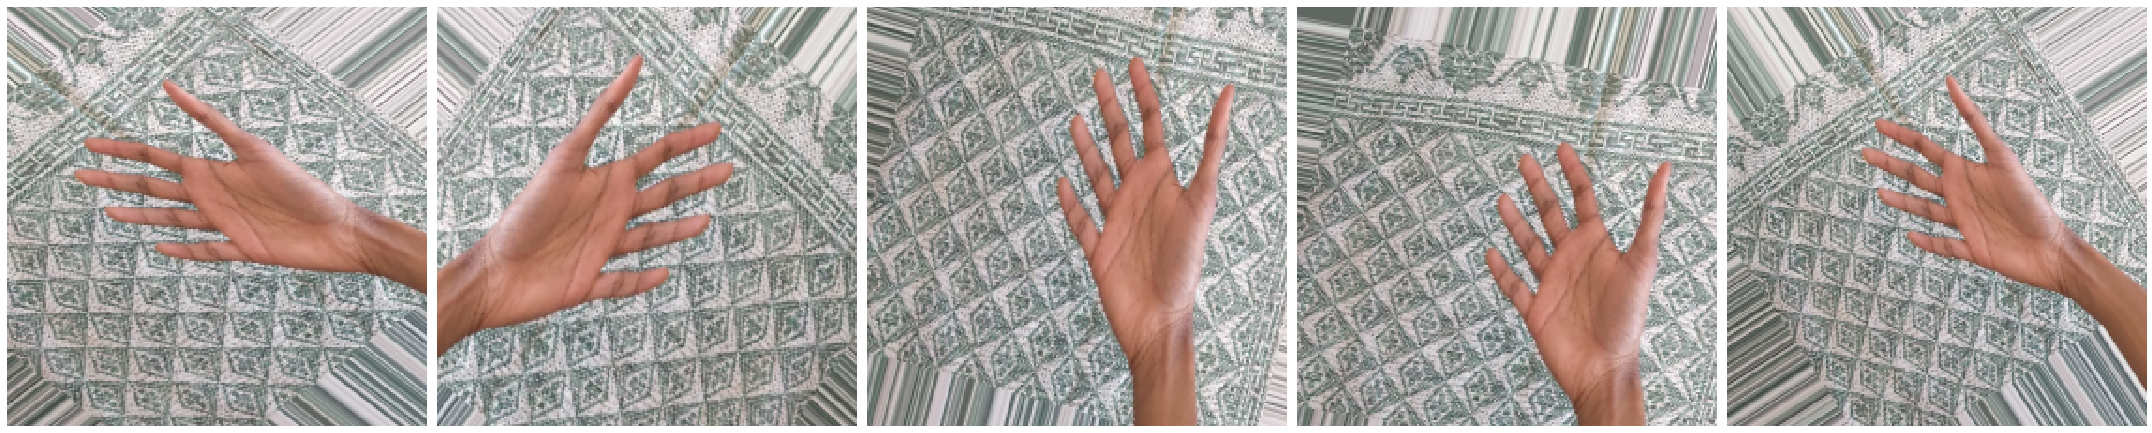

In [6]:
augmented_images = [train_generator[0][0][1] for i in range(5)]

plotImages(augmented_images)

## Custom CNN 

In [7]:
# Checking batch size

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 224, 224, 3)
labels batch shape: (32, 3)


In [8]:
# Creating directory to save the model

MODEL_NAME = 'HSRS_GlobalSignsDataset_16June_1200'
os.mkdir('D:\\Mayuresh\\hsrsnao\\Models\\'+MODEL_NAME)

In [9]:
# CNN Architecture

model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPool2D(pool_size=(2,2)),
    
    Conv2D(32, (3, 3), activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPool2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])

#### Configuring training parameters

In [10]:
from tensorflow.keras import optimizers
opt = optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
#                optimizer=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       7

In [11]:
TRAIN_TOTAL = sum([len(files) for root, dirs, files in os.walk(train_dir)])
VALIDATION_TOTAL = sum([len(files) for root, dirs, files in os.walk(validation_dir)])
# TEST_TOTAL = sum([len(files) for root, dirs, files in os.walk(test_dir)])

EPOCHS = 30
STEPS_PER_EPOCH = TRAIN_TOTAL // BATCH_SIZE
VALIDATION_STEPS = VALIDATION_TOTAL // BATCH_SIZE

#### Adding Callbacks for EarlyStopping 

In [12]:
callbacks_list = [
    tf.keras.callbacks.EarlyStopping(monitor = 'accuracy',
                                     min_delta = 0.0001,
                                     patience = 3),
    tf.keras.callbacks.ModelCheckpoint(filepath = 'D:\\Mayuresh\\hsrsnao\\Models\\'+MODEL_NAME+'\\History_'+MODEL_NAME+'.h5',
                                       monitor= 'val_loss',
                                       save_best_only = True)
]

In [13]:
import datetime
starttime = datetime.datetime.now()

history = model.fit(x = train_generator,
                    validation_data = validation_generator,
                    shuffle = True,
                    steps_per_epoch = STEPS_PER_EPOCH,
                    epochs = EPOCHS,
                    initial_epoch = 0,
                    validation_steps  = VALIDATION_STEPS,
                    validation_freq = 1,
                    callbacks = callbacks_list,
                    verbose = 1)

endtime = datetime.datetime.now()
diff = endtime - starttime

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 216 steps, validate for 92 steps
Epoch 1/30
216/216 [==============================] - 163s 755ms/step - loss: 1.0712 - accuracy: 0.3987 - val_loss: 0.9462 - val_accuracy: 0.5870
Epoch 2/30
216/216 [==============================] - 166s 768ms/step - loss: 0.7333 - accuracy: 0.6721 - val_loss: 0.4466 - val_accuracy: 0.8098
Epoch 3/30
216/216 [==============================] - 166s 770ms/step - loss: 0.4087 - accuracy: 0.8327 - val_loss: 0.2667 - val_accuracy: 0.8923
Epoch 4/30
216/216 [==============================] - 165s 766ms/step - loss: 0.2819 - accuracy: 0.8901 - val_loss: 0.2103 - val_accuracy: 0.9198
Epoch 5/30
216/216 [==============================] - 165s 763ms/step - loss: 0.1927 - accuracy: 0.9285 - val_loss: 0.0745 - val_accuracy: 0.9745
Epoch 6/30
216/216 [==============================] - 162s 751ms/step - loss: 0.1378 - accuracy: 0.9487 - val_loss: 0.1029 - val_accuracy: 0.9691
Epoch 7/30
216/216 [===========

#### Saving Model History

In [14]:
import pickle

# save:
f = open('D:\\Mayuresh\\hsrsnao\\Models\\'+MODEL_NAME+'\\History_'+MODEL_NAME+'.pckl', 'wb')
pickle.dump(history.history, f)
f.close()

# retrieve:    
f = open('D:\\Mayuresh\\hsrsnao\\Models\\'+MODEL_NAME+'\\History_'+MODEL_NAME+'.pckl', 'rb')
saved_history = pickle.load(f)
f.close()
if (history.history == saved_history):
    print('``` History is saved successfully for '+ MODEL_NAME + ' ```')
else:
    print(' Could not save model history ')

``` History is saved successfully for HSRS_GlobalSignsDataset_16June_1200 ```


#### Plotting Model Accuracy and Loss

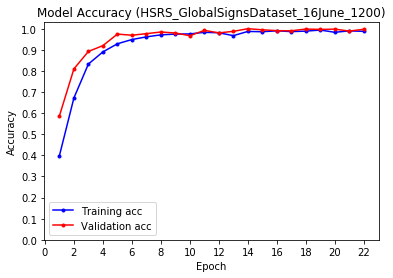

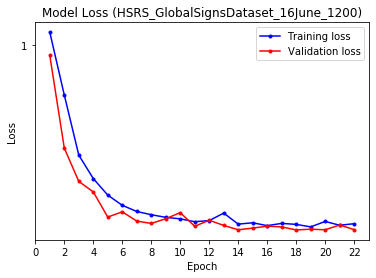

In [15]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

acc = saved_history['accuracy']
val_acc = saved_history['val_accuracy']
loss = saved_history['loss']
val_loss = saved_history['val_loss']
epochs = np.arange(1, len(acc) + 1)

plt.plot(epochs, acc, '-b.', label='Training acc')
plt.plot(epochs, val_acc, '-r.', label='Validation acc')
plt.xticks(np.arange(0, len(val_acc)+1, 2))
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.title('Model Accuracy ('+MODEL_NAME+')')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
plt.plot(epochs, loss, '-b.', label='Training loss')
plt.plot(epochs, val_loss, '-r.', label='Validation loss')
plt.xticks(np.arange(0, len(val_loss)+1, 2))
plt.yticks(np.arange(int(max(val_loss)+1), -0.5, -2))
plt.title('Model Loss ('+MODEL_NAME+')')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# plt1.savefig('D:\\Mayuresh\\OneDrive - UiT Office 365\\Model summaries\\HSRS_ThesisDataset_5Mar_1330.png', dpi=500)
plt.show()

In [16]:
train_acc = np.asarray(history.history['accuracy']).mean()
validation_acc = np.asarray(history.history['val_accuracy']).mean()

# test_generator = test_datagen.flow_from_directory(test_dir,
#                                                   target_size=(150, 150),
#                                                   batch_size=BATCH_SIZE,
#                                                   class_mode='categorical')
# test_loss, test_acc = model.evaluate_generator(test_generator, steps=TEST_TOTAL//BATCH_SIZE)

In [17]:
print('### CUSTOM CNN ###')
print('Model Name: ', MODEL_NAME)
print('Model Training Time: ', diff.seconds/60)
print('Train acc:', train_acc * 100)
print('Val acc:', validation_acc * 100)
# print('test acc:', test_acc)

### CUSTOM CNN ###
Model Name:  HSRS_GlobalSignsDataset_16June_1200
Model Training Time:  58.03333333333333
Train acc: 92.61314868927002
Val acc: 95.33873200416565
